2022.11.16.

Image Classification using LeNet-5

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#MLP 이미지 분류

In [4]:
datasetPath = "/content/drive/MyDrive/machine_learning/dataset"
parameterPath = "/content/drive/MyDrive/machine_learning/parameters"

### 패키지 선언

In [2]:
import torch
import torch.nn as nn
import torchvision.datasets as dataset
import torchvision.transforms as transform
from torch.utils.data import DataLoader
import numpy as np

## Dataset 선언

In [5]:
# Training dataset 다운로드
cifar10_train = dataset.CIFAR10(root = datasetPath, # 데이터셋이 저장된 위치
                            train = True,
                            transform = transform.ToTensor(),
                            download = True)
# Testing dataset 다운로드
cifar10_test = dataset.CIFAR10(root = datasetPath,
                            train = False,
                            transform = transform.ToTensor(),
                            download = True)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting /content/drive/MyDrive/marthinruning/dataset/cifar-10-python.tar.gz to /content/drive/MyDrive/marthinruning/dataset
Files already downloaded and verified


## Multi Layer Perceptron 모델 정의

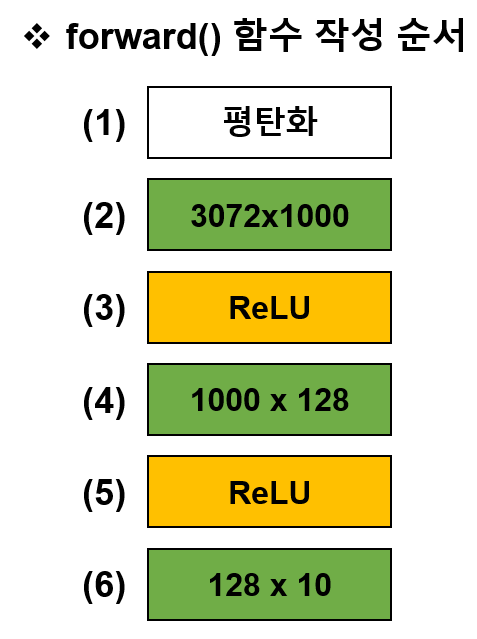

In [6]:
class MLP(nn.Module):
  
  def __init__(self):
    super(MLP, self).__init__()

    # 신경망 파라미터 선언 (3072 x 1000, 1000 x 128, 128 x 10)
    self.fc1=nn.Linear(in_features=3072, out_features=1000)
    self.fc2=nn.Linear(in_features=1000, out_features=128)
    self.fc3=nn.Linear(in_features=128, out_features=10)
    
    # Activation function 선언: nn.ReLU()
    self.relu = nn.ReLU()

  def forward(self, x):
    # 이미지 평탄화 수행: batch size x 3072
    x= x.view(-1, 3072) # 2D -> 1D
    y=self.relu(self.fc1(x))
    y=self.relu(self.fc2(y))
    y=self.relu(self.fc3(y))
    
    # FC layer와 activation function 추가 (Softmax 함수는 자동 적용되므로 호출하지 않아도 상관없음)

    return y

## Hyper-parameters 지정

In [7]:
batch_size = 100
learning_rate = 0.1
training_epochs = 15
loss_function = nn.CrossEntropyLoss()
network = MLP()
optimizer = torch.optim.SGD(network.parameters(), lr = learning_rate)

data_loader = DataLoader(dataset=cifar10_train,
                         batch_size=batch_size,
                         shuffle=True,
                         drop_last=True)

## Perceptron 학습을 위한 반복문 선언

In [7]:
for epoch in range(training_epochs):
  avg_cost = 0
  total_batch = len(data_loader)

  for img, label in data_loader:

    pred = network(img)

    loss = loss_function(pred, label)
    optimizer.zero_grad() # gradient 초기화
    loss.backward()
    optimizer.step()

    avg_cost += loss / total_batch
  
  print('Epoch: %d Loss = %f'%(epoch+1, avg_cost))

print('Learning finished')

Epoch: 1 Loss = 2.093985
Epoch: 2 Loss = 1.871286
Epoch: 3 Loss = 1.763212
Epoch: 4 Loss = 1.648516
Epoch: 5 Loss = 1.583158
Epoch: 6 Loss = 1.529842
Epoch: 7 Loss = 1.493162
Epoch: 8 Loss = 1.457372
Epoch: 9 Loss = 1.421477
Epoch: 10 Loss = 1.389029
Epoch: 11 Loss = 1.363570
Epoch: 12 Loss = 1.335572
Epoch: 13 Loss = 1.310331
Epoch: 14 Loss = 1.286184
Epoch: 15 Loss = 1.258467
Learning finished


## 학습이 완료된 모델을 이용해 정답률 확인

In [8]:
network.eval()
img_test = torch.tensor(np.transpose(cifar10_test.data , (0, 3, 1, 2))) /255.
label_test = torch.tensor(cifar10_test.targets)

with torch.no_grad(): # test에서는 기울기 계산 제외
    prediction = network(img_test) # 전체 test data를 한번에 계산

correct_prediction = torch.argmax(prediction, 1) == label_test
accuracy = correct_prediction.float().mean()
print('Accuracy:', accuracy.item())

Accuracy: 0.11180000007152557


## Colab GPU를 이용한 training loop

런타임>런타임 유형 변경>GPU선택

In [9]:
network = network.to('cuda:0')
for epoch in range(training_epochs):
  avg_cost = 0
  total_batch = len(data_loader)

  for img, label in data_loader:
    
    img = img.to('cuda:0')
    label = label.to('cuda:0')

    pred = network(img)

    loss = loss_function(pred, label)
    optimizer.zero_grad() # gradient 초기화
    loss.backward()
    optimizer.step()

    avg_cost += loss / total_batch
  
  print('Epoch: %d Loss = %f'%(epoch+1, avg_cost))

print('Learning finished')

Epoch: 1 Loss = 1.236843
Epoch: 2 Loss = 1.212528
Epoch: 3 Loss = 1.191726
Epoch: 4 Loss = 1.166456
Epoch: 5 Loss = 1.140103
Epoch: 6 Loss = 1.121888
Epoch: 7 Loss = 1.099313
Epoch: 8 Loss = 1.084477
Epoch: 9 Loss = 1.068461
Epoch: 10 Loss = 1.036814
Epoch: 11 Loss = 1.021093
Epoch: 12 Loss = 1.003598
Epoch: 13 Loss = 0.979048
Epoch: 14 Loss = 0.961651
Epoch: 15 Loss = 0.937559
Learning finished


#CNN

MLP에서는 평탄화를 해줘야 했지만 CNN을 쓰면 평탄화를 하지 않아도 된다. (2D)

다만 출력 형태가 Tensor 이므로 예측 결과를 확인 할 수 없다.

이미지 > CNN > Feature maps > 평탄화 > 1D vector > FC layers 로 결과를 확인하고자 한다.

In [10]:
datasetPath = "/content/drive/MyDrive/machine_learning/dataset"
parameterPath = "/content/drive/MyDrive/machine_learning/parameters"

### 패키지 선언

In [11]:
import torch
import torch.nn as nn
import torchvision.datasets as dataset
import torchvision.transforms as transform
from torch.utils.data import DataLoader
import numpy as np

## Dataset 선언

In [12]:
# Training dataset 다운로드
cifar10_train = dataset.CIFAR10(root = datasetPath, # 데이터셋이 저장된 위치
                            train = True,
                            transform = transform.ToTensor(),
                            download = True)
# Testing dataset 다운로드
cifar10_test = dataset.CIFAR10(root = datasetPath,
                            train = False,
                            transform = transform.ToTensor(),
                            download = True)

Files already downloaded and verified
Files already downloaded and verified


## CNN 모델 (LeNet-5) 정의

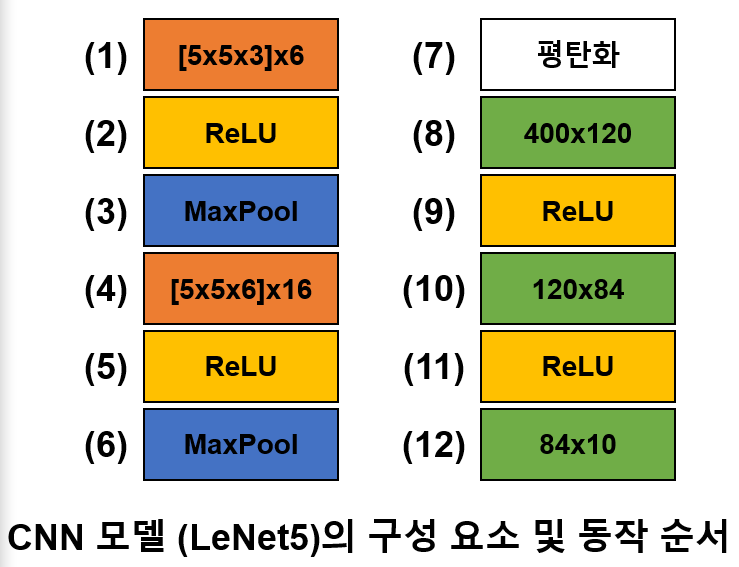

In [13]:
class LeNet5(nn.Module):
  def __init__(self):
    super(LeNet5,self).__init__()
    self.conv1=nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5) 
    self.conv2=nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
    
    self.fc1=nn.Linear(in_features=400, out_features=120)
    self.fc2=nn.Linear(in_features=120, out_features=84) 
    self.fc3=nn.Linear(in_features=84, out_features=10)

    self.relu = nn.ReLU()
    self.maxPool2d = nn.MaxPool2d(kernel_size=2, stride=2)

  def forward(self,x):
    out = self.relu(self.conv1(x))
    out = self.maxPool2d(out)
    out = self.relu(self.conv2(out))
    out = self.maxPool2d(out)

    out = out.view(-1,400) #feature map 평탄화
    out = self.relu(self.fc1(out))
    out = self.relu(self.fc2(out))
    out = self.fc3(out)

    return out

## Hyper-parameters 지정

In [14]:
batch_size = 100
learning_rate = 0.1
training_epochs = 15
loss_function = nn.CrossEntropyLoss()
network = LeNet5()
optimizer = torch.optim.SGD(network.parameters(), lr = learning_rate)

data_loader = DataLoader(dataset=cifar10_train,
                         batch_size=batch_size,
                         shuffle=True,
                         drop_last=True)

## Perceptron 학습을 위한 반복문 선언

In [15]:
for epoch in range(training_epochs):
  avg_cost = 0
  total_batch = len(data_loader)

  for img, label in data_loader:

    pred = network(img)

    loss = loss_function(pred, label)
    optimizer.zero_grad() # gradient 초기화
    loss.backward()
    optimizer.step()

    avg_cost += loss / total_batch
  
  print('Epoch: %d Loss = %f'%(epoch+1, avg_cost))

print('Learning finished')

Epoch: 1 Loss = 2.154504
Epoch: 2 Loss = 1.824778
Epoch: 3 Loss = 1.567131
Epoch: 4 Loss = 1.449101
Epoch: 5 Loss = 1.370931
Epoch: 6 Loss = 1.303386
Epoch: 7 Loss = 1.249930
Epoch: 8 Loss = 1.210180
Epoch: 9 Loss = 1.165800
Epoch: 10 Loss = 1.123923
Epoch: 11 Loss = 1.085258
Epoch: 12 Loss = 1.050535
Epoch: 13 Loss = 1.023117
Epoch: 14 Loss = 0.987994
Epoch: 15 Loss = 0.969306
Learning finished


## 학습이 완료된 모델을 이용해 정답률 확인

In [16]:
network.eval()
img_test = torch.tensor(np.transpose(cifar10_test.data , (0, 3, 1, 2))) /255.
label_test = torch.tensor(cifar10_test.targets)

with torch.no_grad(): # test에서는 기울기 계산 제외
    prediction = network(img_test) # 전체 test data를 한번에 계산

correct_prediction = torch.argmax(prediction, 1) == label_test
accuracy = correct_prediction.float().mean()
print('Accuracy:', accuracy.item())

Accuracy: 0.5795000195503235


## Colab GPU를 이용한 training loop

In [17]:
network = network.to('cuda:0')
for epoch in range(training_epochs):
  avg_cost = 0
  total_batch = len(data_loader)

  for img, label in data_loader:
    
    img = img.to('cuda:0')
    label = label.to('cuda:0')

    pred = network(img)

    loss = loss_function(pred, label)
    optimizer.zero_grad() # gradient 초기화
    loss.backward()
    optimizer.step()

    avg_cost += loss / total_batch
  
  print('Epoch: %d Loss = %f'%(epoch+1, avg_cost))

print('Learning finished')

Epoch: 1 Loss = 0.939670
Epoch: 2 Loss = 0.910957
Epoch: 3 Loss = 0.892280
Epoch: 4 Loss = 0.871957
Epoch: 5 Loss = 0.844041
Epoch: 6 Loss = 0.821768
Epoch: 7 Loss = 0.803123
Epoch: 8 Loss = 0.784110
Epoch: 9 Loss = 0.766003
Epoch: 10 Loss = 0.753464
Epoch: 11 Loss = 0.730765
Epoch: 12 Loss = 0.724862
Epoch: 13 Loss = 0.710666
Epoch: 14 Loss = 0.693045
Epoch: 15 Loss = 0.688535
Learning finished
